## **Análise do Sistema Metroviário DE São Paulo**


## **Resumo**

<div style="text-align: justify;">
Este projeto tem como objetivo analisar o sistema metroviário de São Paulo, considerando o sistema de metro e trens, as informações foram retiradas do portal de transparencia das empresas Metro, CPTM, ViaQuatro e Linha Mobilidade,
O grafo consiste das estações de 5 linhas do metrô de São Paulo (Azul, Verde, Vermelha, Amarela, Lilás e Prata) e 7 linhas de trem (Rubi, Diamante, Esmeralda, Turquesa, Coral, Safira e Jade), onde cada estação será um representada por um vértice e as conexões entre estações representadas por arestas com pesos dado pela diferença de passageiros entre as duas estações.
</div>

## **Modelagem**


<div style="text-align: justify;">
O grafo foi modelado da seguinte forma: cada estação do metrô de São Paulo foi representada por um vértice e as conexões, entre cada par de estações, foram representadas por arestas, o sistema de ponderação das arestas é explica na sequência. Os dados do projeto foram coletados através do site e portais de transparencia do Metro de SP (https://transparencia.metrosp.com.br/dataset/demanda/resource/e69866e9-6c7a-424f-ad4d-816c6b96b1c4) CPTM, Via Mobilidade e ViaQuatro. Após a criação do grafo base, adicionamos ao grafo as estações de cada linha sequencialmente, tomando cuidado para não acrescentar a mesma estação duas vezes caso ela esteja presente em mais de uma linha.
<div>

**Importando bibliotecas necessárias**

In [202]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import expon
from matplotlib.pyplot import figure

## Estatistica para cálculos dos pesos das arestas

O peso das arestas foi baseado na demanda por passageiros de cada estação. Os dados foram coletados de (1, 2, 3) sendo todos colocados como a média diaria por milhares de passageiros. O peso entre aresta A e B é a diferença da demanda entre as duas estações.

In [203]:
linha_azul = pd.read_csv('Dados/Metro/Linha_Azul.csv', sep=';')
linha_verde = pd.read_csv('Dados/Metro/Linha_Verde.csv', sep=';')
linha_vermelha = pd.read_csv('Dados/Metro/Linha_Vermelha.csv', sep=';')
linha_amarela = pd.read_csv('Dados/Metro/Linha_Amarela.csv', sep=';')
linha_lilas = pd.read_csv('Dados/Metro/Linha_Lilas.csv', sep=';')
linha_rubi = pd.read_csv('Dados/Metro/Linha_Rubi.csv', sep=';')
linha_diamante = pd.read_csv('Dados/Metro/Linha_Diamante.csv', sep=';')
linha_esmeralda = pd.read_csv('Dados/Metro/Linha_Esmeralda.csv', sep=';')
linha_turquesa = pd.read_csv('Dados/Metro/Linha_Turquesa.csv', sep=';')
linha_coral = pd.read_csv('Dados/Metro/Linha_Coral.csv', sep=';')
linha_safira = pd.read_csv('Dados/Metro/Linha_Safira.csv', sep=';')
linha_jade = pd.read_csv('Dados/Metro/Linha_Jade.csv', sep=';')
linha_prata = pd.read_csv('Dados/Metro/Linha_Prata.csv', sep=';')

In [204]:
linha_azul = linha_azul.drop(columns=['Jan', 'Fev', 'Mar',	'Abr', 'Mai', 'Jun', 'Jul',	'Ago', 'Set', 'Out', 'Nov', 'Dez'])

linha_verde = linha_verde.drop(columns=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])

linha_vermelha = linha_vermelha.drop(columns=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul',	'Ago', 'Set', 'Out', 'Nov', 'Dez'])

linha_prata = linha_prata.drop(columns=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])


In [205]:
linha_rubi['Media'] = pd.to_numeric(linha_rubi['Media'], errors='coerce')
linha_rubi['Media'] = linha_rubi['Media']/31000

linha_turquesa['Media'] = pd.to_numeric(linha_turquesa['Media'], errors='coerce')
linha_turquesa['Media'] = linha_turquesa['Media']/31000

linha_coral['Media'] = pd.to_numeric(linha_coral['Media'], errors='coerce')
linha_coral['Media'] = linha_coral['Media']/31000

linha_safira['Media'] = pd.to_numeric(linha_safira['Media'], errors='coerce')
linha_safira['Media'] = linha_safira['Media']/31000

linha_jade['Media'] = pd.to_numeric(linha_jade['Media'], errors='coerce')
linha_jade['Media'] = linha_jade['Media']/31000

In [206]:
linha_azul['Difference'] = linha_azul['Media'].diff().abs()
linha_verde['Difference'] = linha_verde['Media'].diff().abs()
linha_vermelha['Difference'] = linha_vermelha['Media'].diff().abs()
linha_amarela['Difference'] = linha_amarela['Media'].diff().abs()
linha_lilas['Difference'] = linha_lilas['Media'].diff().abs()
linha_rubi['Difference'] = linha_rubi['Media'].diff().abs()
linha_diamante['Difference'] = linha_diamante['Media'].diff().abs()
linha_esmeralda['Difference'] = linha_esmeralda['Media'].diff().abs()
linha_turquesa['Difference'] = linha_turquesa['Media'].diff().abs()
linha_coral['Difference'] = linha_coral['Media'].diff().abs()
linha_safira['Difference'] = linha_safira['Media'].diff().abs()
linha_jade['Difference'] = linha_jade['Media'].diff().abs()
linha_prata['Difference'] = linha_prata['Media'].diff().abs()

**Criando o grafo G**

In [207]:
G = nx.Graph()

## **Adicionando vértices**

### Linha 1 Azul


In [208]:
G.add_nodes_from(["Jabaquara", "Conceição", "São Judas", "Saúde", "Praça da Árvore", "Santa Cruz", "Vila Mariana", "Ana Rosa", "Paraíso", "Vergueiro", "São Joaquim", "Liberdade", "Sé", "São Bento", "Luz", "Tiradentes", "Armênia", "Portuguesa-Tietê", "Carandiru", "Santana", "Jardim São Paulo-Ayrton Senna", "Parada Inglesa", "Tucuruvi"])

In [209]:
G.add_weighted_edges_from([("Jabaquara", "Conceição", 39.00), ("Conceição", "São Judas", 14), ("São Judas", "Saúde", 11), ("Saúde", "Praça da Árvore", 11), ("Praça da Árvore", "Santa Cruz", 78), ("Santa Cruz", "Vila Mariana", 73), ("Vila Mariana", "Ana Rosa", 57), ("Ana Rosa", "Paraíso", 19), ("Paraíso", "Vergueiro", 70), ("Vergueiro", "São Joaquim", 3), ("São Joaquim", "Liberdade", 8), ("Liberdade", "Sé", 148), ("Sé", "São Bento", 118), ("São Bento", "Luz", 78), ("Luz", "Tiradentes", 114), ("Tiradentes", "Armênia", 4), ("Armênia", "Portuguesa-Tietê", 25), ("Portuguesa-Tietê", "Carandiru", 33), ("Carandiru", "Santana", 37), ("Santana", "Jardim São Paulo-Ayrton Senna", 37), ("Jardim São Paulo-Ayrton Senna", "Parada Inglesa", 2), ("Parada Inglesa", "Tucuruvi", 42)])

### Linha 2 Verde


In [210]:
G.add_nodes_from(["Vila Madalena", "Santuário Nossa Senhora de Fátima-Sumaré", "Clínicas", "Paulista-Consolação", "Trianon-Masp", "Brigadeiro", "Paraíso", "Ana Rosa", "Chácara Klabin", "Santos-Imigrantes", "Alto do Ipiranga", "Sacoma", "Tamanduatei", "Vila Prudente"],)

In [211]:
G.add_weighted_edges_from([("Vila Madalena", "Santuário Nossa Senhora de Fátima-Sumaré", 11), ("Santuário Nossa Senhora de Fátima-Sumaré", "Clínicas", 11), ("Clínicas", "Paulista-Consolação", 76), ("Paulista-Consolação", "Trianon-Masp", 51), ("Trianon-Masp", "Brigadeiro", 3), ("Brigadeiro", "Paraíso", 13), ("Paraíso", "Ana Rosa", 3), ("Ana Rosa", "Chácara Klabin", 23), ("Chácara Klabin", "Santos-Imigrantes", 67), ("Santos-Imigrantes", "Alto do Ipiranga", 3), ("Alto do Ipiranga", "Sacoma", 22), ("Sacoma", "Tamanduatei", 34), ("Tamanduatei", "Vila Prudente", 2)])

### Linha 3 Vermelha

In [212]:
G.add_nodes_from(["Palmeiras-Barra Funda", "Marechal Deodoro", "Santa Cecília", "República", "Anhangabaú", "Sé", "Pedro II", "Brás", "Bresser-Mooca", "Belém", "Tatuapé", "Carrão-Assaí Atacadista", "Penha", "Vila Matilde", "Guilhermina-Esperança", "Patriarca", "Artur Alvim", "Corinthians-Itaquera"])

In [213]:
G.add_weighted_edges_from([("Palmeiras-Barra Funda", "Marechal Deodoro", 109), ("Marechal Deodoro", "Santa Cecília", 3), ("Santa Cecília", "República", 96), ("República", "Anhangabaú", 68), ("Anhangabaú", "Sé", 149), ("Sé", "Pedro II", 184), ("Pedro II", "Brás", 56), ("Brás", "Bresser-Mooca", 41), ("Bresser-Mooca", "Belém", 6), ("Belém", "Tatuapé", 42), ("Tatuapé", "Carrão-Assaí Atacadista", 31), ("Carrão-Assaí Atacadista", "Penha", 20), ("Penha", "Vila Matilde", 1), ("Vila Matilde", "Guilhermina-Esperança", 5), ("Guilhermina-Esperança", "Patriarca", 1), ("Patriarca", "Artur Alvim", 33), ("Artur Alvim", "Corinthians-Itaquera", 18)])

### Linha 4 Amarela

In [214]:
G.add_nodes_from(["Luz", "República", "Higienópolis-Mackenzie", "Paulista-Consolação", "Oscar Freire", "Fradique Coutinho", "Faria Lima", "Pinheiros", "Butantã", "São Paulo-Morumbi", "Vila Sônia"])

In [215]:
G.add_weighted_edges_from([("Luz", "República", 37), ("República", "Higienópolis-Mackenzie", 791), ("Higienópolis-Mackenzie", "Paulista-Consolação", 83), ("Paulista-Consolação", "Oscar Freire", 86), ("Oscar Freire", "Fradique Coutinho", 6), ("Fradique Coutinho", "Faria Lima", 18), ("Faria Lima", "Pinheiros", 73), ("Pinheiros", "Butantã", 69), ("Butantã", "São Paulo-Morumbi", 13), ("São Paulo-Morumbi", "Vila Sônia", 24)])

### Linha 5 Lilas

In [216]:
G.add_nodes_from(["Capão Redondo", "Campo Limpo", "Vila das Belezas", "Giovanni Gronchi", "Santo Amaro", "Largo Treze", "Adolfo Pinheiro", "Alto da Boa Vista", "Borba Gato", "Brooklin", "Campo Belo", "Eucaliptos", "Moema", "AACD-Servidor", "Hospital São Paulo", "Santa Cruz", "Chácara Klabin"])

In [217]:
G.add_weighted_edges_from([("Capão Redondo", "Campo Limpo", 58), ("Campo Limpo", "Vila das Belezas", 23), ("Vila das Belezas", "Giovanni Gronchi", 8), ("Giovanni Gronchi", "Santo Amaro", 70), ("Santo Amaro", "Largo Treze", 58), ("Largo Treze", "Adolfo Pinheiro", 23), ("Adolfo Pinheiro", "Alto da Boa Vista", 7), ("Alto da Boa Vista", "Borba Gato", 6), ("Borba Gato", "Brooklin", 6), ("Brooklin", "Campo Belo", 4), ("Campo Belo", "Eucaliptos", 5), ("Eucaliptos", "Moema", 2), ("Moema", "AACD-Servidor", 9), ("AACD-Servidor", "Hospital São Paulo", 1), ("Hospital São Paulo", "Santa Cruz", 54), ("Santa Cruz", "Chácara Klabin", 25)])

### Linha 7 Rubi

In [218]:
G.add_nodes_from(["Luz", "Palmeiras-Barra Funda", "Agua Branca", "Lapa R", "Piqueri", "Pirituba", "Vila Clarice", "Jaraguá", "Vila Aurora", "Perus", "Caieiras", "Franco da Rocha", "Baltazar Fidélis", "Francisco Morato", "Botujuru", "Campo Limpo Paulista", "Várzea Paulista", "Jundiaí"])

In [219]:
G.add_weighted_edges_from([("Luz", "Palmeiras-Barra Funda", 71), ("Palmeiras-Barra Funda", "Agua Branca", 104), ("Agua Branca", "Lapa R", 18), ("Lapa R", "Piqueri", 7), ("Piqueri", "Pirituba", 6), ("Pirituba", "Vila Clarice", 10), ("Vila Clarice", "Jaraguá", 11), ("Jaraguá", "Vila Aurora", 6), ("Vila Aurora", "Perus", 10), ("Perus", "Caieiras", 8), ("Caieiras", "Franco da Rocha", 3), ("Franco da Rocha", "Baltazar Fidélis", 12), ("Baltazar Fidélis", "Francisco Morato", 13), ("Francisco Morato", "Botujuru", 36), ("Botujuru", "Campo Limpo Paulista", 1), ("Campo Limpo Paulista", "Várzea Paulista", 1), ("Várzea Paulista", "Jundiaí", 328)])

### Linha 8 Diamante

In [220]:
G.add_nodes_from(["Armador Bueno", "Santa Rita", "Itapevi", "Eng Cardoso", "Sangrado Coração", "Jandira", "Jardim Silveira", "Jardim Belval", "Barueri", "Antonio João", "Santa Terezinha", "Carapicuiba", "General Miguel Costa", "Quitauna", "Comandante Sampaio", "Osasco", "Presidente Altino", "Imperatriz Leopoldina", "Domingos Moraes", "Lapa D", "Palmeiras-Barra Funda", "Julio Prestes"])

In [221]:
G.add_weighted_edges_from([("Armador Bueno", "Santa Rita", 2), ("Santa Rita", "Itapevi", 2), ("Itapevi", "Eng Cardoso", 22), ("Eng Cardoso", "Sangrado Coração", 19), ("Sangrado Coração", "Jandira", 7), ("Jandira", "Jardim Silveira", 6), ("Jardim Silveira", "Jardim Belval", 3), ("Jardim Belval", "Barueri", 18), ("Barueri", "Antonio João", 8), ("Antonio João", "Santa Terezinha", 12), ("Santa Terezinha", "Carapicuiba", 23), ("Carapicuiba", "General Miguel Costa", 11), ("General Miguel Costa", "Quitauna", 9), ("Quitauna", "Comandante Sampaio", 4), ("Comandante Sampaio", "Osasco", 27), ("Osasco", "Presidente Altino", 29), ("Presidente Altino", "Imperatriz Leopoldina", 8), ("Imperatriz Leopoldina", "Domingos Moraes", 2), ("Domingos Moraes", "Lapa D", 2), ("Lapa D", "Palmeiras-Barra Funda", 75), ("Palmeiras-Barra Funda", "Julio Prestes", 91)])

### Linha 9 Esmeralda

In [222]:
G.add_nodes_from(["Osasco", "Presidente Altino", "Ceasa", "Villa Lobos–Jaguaré", "Cidade Universitária", "Pinheiros", "Hebraica–Rebouças", "Cidade Jardim", "Vila Olímpia", "Berrini", "Morumbi", "Granja Julieta", "João Dias", "Santo Amaro", "Socorro", "Jurubatuba", "Autódromo", "Primavera–Interlagos", "Grajaú", "Bruno Covas/Mendes–Vila Natal", "Varginha"])

In [223]:
G.add_weighted_edges_from([("Osasco", "Presidente Altino", 13), ("Presidente Altino", "Ceasa", 2), ("Ceasa", "Villa Lobos–Jaguaré", 6), ("Villa Lobos–Jaguaré", "Cidade Universitária", 5), ("Cidade Universitária", "Pinheiros", 98), ("Pinheiros", "Hebraica–Rebouças", 96), ("Hebraica–Rebouças", "Cidade Jardim", 6), ("Cidade Jardim", "Vila Olímpia", 15), ("Vila Olímpia", "Berrini", 12), ("Berrini", "Morumbi", 4), ("Morumbi", "Granja Julieta", 10), ("Granja Julieta", "João Dias", 5), ("João Dias", "Santo Amaro", 79), ("Santo Amaro", "Socorro", 77), ("Socorro", "Jurubatuba", 4), ("Jurubatuba", "Autódromo", 4), ("Autódromo", "Primavera–Interlagos", 5), ("Primavera–Interlagos", "Grajaú", 30), ("Grajaú", "Bruno Covas/Mendes–Vila Natal", 13), ("Bruno Covas/Mendes–Vila Natal", "Varginha", 33)])

### Linha 10 Turquesa

In [224]:
G.add_nodes_from(["Luz", "Brás", "Juventude–Mooca", "Ipiranga", "Tamanduatei", "São Caetano", "Utinga", "Prefeito Saladino", "Santo André", "Capuava", "Mauá", "Guapituba", "Ribeirão Pires", "Rio Grande da Serra"])

In [225]:
G.add_weighted_edges_from([("Luz", "Brás", 22), ("Brás", "Juventude–Mooca", 17), ("Juventude–Mooca", "Ipiranga", 1), ("Ipiranga", "Tamanduatei", 46), ("Tamanduatei", "São Caetano", 33), ("São Caetano", "Utinga", 16), ("Utinga", "Prefeito Saladino", 1), ("Prefeito Saladino", "Santo André", 37), ("Santo André", "Capuava", 38), ("Capuava", "Mauá", 1), ("Mauá", "Guapituba", 32), ("Guapituba", "Ribeirão Pires", 6), ("Ribeirão Pires", "Rio Grande da Serra", 5)])

### Linha 11 Coral

In [226]:
G.add_nodes_from(["Luz", "Brás", "Tatuapé", "Corinthians-Itaquera", "Dom Bosco", "José Bonifácio", "Guaianases", "Antonio Gianetti Neto", "Ferraz de Vasconcelos", "Poá", "Calmon Viana", "Suzano", "Jundiapeba", "Bras Cubas", "Mogi das Cruzes", "Estudantes"])

In [227]:
G.add_weighted_edges_from([("Luz", "Brás", 22), ("Brás", "Tatuapé", 34), ("Tatuapé", "Corinthians-Itaquera", 31), ("Corinthians-Itaquera", "Dom Bosco", 20), ("Dom Bosco", "José Bonifácio", 1), ("José Bonifácio", "Guaianases", 594), ("Guaianases", "Antonio Gianetti Neto", 597), ("Antonio Gianetti Neto", "Ferraz de Vasconcelos", 10), ("Ferraz de Vasconcelos", "Poá", 11), ("Poá", "Calmon Viana", 5), ("Calmon Viana", "Suzano", 26), ("Suzano", "Jundiapeba", 25), ("Jundiapeba", "Bras Cubas", 1), ("Bras Cubas", "Mogi das Cruzes", 3), ("Mogi das Cruzes", "Estudantes", 3)])

### Linha 12 Safira

In [228]:
G.add_nodes_from(["Brás", "Tatuapé", "Engenheiro Goulart", "USP Leste", "Comendador Ermelino", "São Miguel Paulista", "Jardim Helena-Vila Mara", "Itaim Paulista", "Jardim Romano", "Engenheiro Manoel Feio", "Itaquaquecetuba", "Aracaré", "Calmon Viana"])

In [229]:
G.add_weighted_edges_from([("Brás", "Tatuapé", 19), ("Tatuapé", "Engenheiro Goulart", 16), ("Engenheiro Goulart", "USP Leste", 1), ("USP Leste", "Comendador Ermelino", 2), ("Comendador Ermelino", "São Miguel Paulista", 7), ("São Miguel Paulista", "Jardim Helena-Vila Mara", 1), ("Jardim Helena-Vila Mara", "Itaim Paulista", 12), ("Itaim Paulista", "Jardim Romano", 10), ("Jardim Romano", "Engenheiro Manoel Feio", 8), ("Engenheiro Manoel Feio", "Itaquaquecetuba", 7), ("Itaquaquecetuba", "Aracaré", 10), ("Aracaré", "Calmon Viana", 4)])

### Linha 13 Jade

In [230]:
G.add_nodes_from(["Engenheiro Goulart", "Guarulhos–Cecap", "Aeroporto-Guarulhos"])

In [231]:
G.add_weighted_edges_from([("Engenheiro Goulart", "Guarulhos–Cecap", 3), ("Guarulhos–Cecap", "Aeroporto-Guarulhos", 5)])

### Linha 15 Prata

In [232]:
G.add_nodes_from(["Vila Prudente", "Oratório", "São Lucas", "Camilo Haddad", "Vila Tolstói", "Vila União", "Jardim Planalto", "Sapopemba", "Fazenda da Juta", "São Mateus", "Jardim Colonial"])

In [233]:
G.add_weighted_edges_from([("Vila Prudente", "Oratório", 51), ("Oratório", "São Lucas", 2), ("São Lucas", "Camilo Haddad", 1), ("Camilo Haddad", "Vila Tolstói", 1), ("Vila Tolstói", "Vila União", 1), ("Vila União", "Jardim Planalto", 4), ("Jardim Planalto", "Sapopemba", 1), ("Sapopemba", "Fazenda da Juta", 5), ("Fazenda da Juta", "São Mateus", 12), ("São Mateus", "Jardim Colonial", 6)])

# **Exportando grafo em formato gexf para utilização do Gephi**

In [234]:
nx.write_gexf(G, path="graph.gexf", version="1.2draft")

# **Grafo**

![Grafo](screenshot_035306.png)


## **Análise do grafo**

## Análise das propriedades basicas do grafo.

Nesta seção iremos analisar algumas propriedades básicas do grafo como a ordem, o tamanho, o diâmetro, a conectividade dos vértices, a conectividade das arestas, a média dos menores caminhos, além de verificar se o grafo é conexo.



In [235]:
data = {
    "Ordem" : [G.order()],
    "Tamanho" : [G.size()],
    "Tamanho ponderado" : [G.size(weight="weight")],
    "Conexo" : [nx.is_connected(G)],
    "Menor caminho médio" : [nx.average_shortest_path_length(G)],
    "Diametro" : [nx.diameter(G)],
}

df = pd.DataFrame(data)
print(df)

   Ordem  Tamanho  Tamanho ponderado  Conexo  Menor caminho médio  Diametro
0    174      184             7027.0    True            14.416052        39


In [236]:
exc = nx.eccentricity(G)
max_dist = [key for key, value in sorted(exc.items(), key=lambda x: x[1], reverse=True)[:2]]


df_exc = pd.DataFrame(list(exc.items()), columns=["Node", "Eccentricity"]).sort_values(by="Eccentricity")

path = nx.shortest_path(G, source = max_dist[0], target = max_dist[1] , weight="weight")
print(max_dist)
print(path)

['Jundiaí', 'Varginha']
['Jundiaí', 'Várzea Paulista', 'Campo Limpo Paulista', 'Botujuru', 'Francisco Morato', 'Baltazar Fidélis', 'Franco da Rocha', 'Caieiras', 'Perus', 'Vila Aurora', 'Jaraguá', 'Vila Clarice', 'Pirituba', 'Piqueri', 'Lapa R', 'Agua Branca', 'Palmeiras-Barra Funda', 'Lapa D', 'Domingos Moraes', 'Imperatriz Leopoldina', 'Presidente Altino', 'Ceasa', 'Villa Lobos–Jaguaré', 'Cidade Universitária', 'Pinheiros', 'Hebraica–Rebouças', 'Cidade Jardim', 'Vila Olímpia', 'Berrini', 'Morumbi', 'Granja Julieta', 'João Dias', 'Santo Amaro', 'Socorro', 'Jurubatuba', 'Autódromo', 'Primavera–Interlagos', 'Grajaú', 'Bruno Covas/Mendes–Vila Natal', 'Varginha']


![LP](Figures/MetroSP2024LongestPath.png)

## Análise de centralidade de grau

In [237]:
deg_centrality = nx.degree_centrality(G)

print(deg_centrality)
centrality_sorted = ((sorted(deg_centrality.items(), key=lambda item: item[1],reverse=True)))
print(centrality_sorted[0]) # vertice com maior centralidade de grau [relativa]


{'Jabaquara': 0.005780346820809248, 'Conceição': 0.011560693641618497, 'São Judas': 0.011560693641618497, 'Saúde': 0.011560693641618497, 'Praça da Árvore': 0.011560693641618497, 'Santa Cruz': 0.023121387283236993, 'Vila Mariana': 0.011560693641618497, 'Ana Rosa': 0.017341040462427744, 'Paraíso': 0.017341040462427744, 'Vergueiro': 0.011560693641618497, 'São Joaquim': 0.011560693641618497, 'Liberdade': 0.011560693641618497, 'Sé': 0.023121387283236993, 'São Bento': 0.011560693641618497, 'Luz': 0.028901734104046242, 'Tiradentes': 0.011560693641618497, 'Armênia': 0.011560693641618497, 'Portuguesa-Tietê': 0.011560693641618497, 'Carandiru': 0.011560693641618497, 'Santana': 0.011560693641618497, 'Jardim São Paulo-Ayrton Senna': 0.011560693641618497, 'Parada Inglesa': 0.011560693641618497, 'Tucuruvi': 0.005780346820809248, 'Vila Madalena': 0.005780346820809248, 'Santuário Nossa Senhora de Fátima-Sumaré': 0.011560693641618497, 'Clínicas': 0.011560693641618497, 'Paulista-Consolação': 0.0231213872

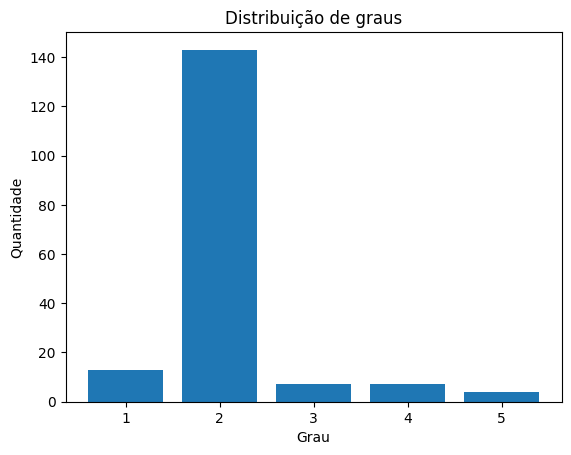

In [238]:
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)
plt.bar(*np.unique(degree_sequence, return_counts=True))
plt.title("Distribuição de graus")
plt.xlabel("Grau")
plt.ylabel("Quantidade")
plt.show()

# Análise de expansão da rede

Agora iremos analisar o grafo assumindo três expanções do sistema, a adição da linha laranja, da expanssão da linha verde e a adição da linha ouro.

## Linha 2 Verde - E

Segundo 6, a expansão da linha 2 verde irá beneficiar 320 mil pessoas por dia, em 7 novas estações se conectando a linha vermelha na estação Penha. Para definir os pesos das arestas iremos estimar a demanda das estações, da seguinte forma iremos normalizar a utilização atual da linha verde e caclular a reta de regressão para a utilização em ordem descrecente. Com a reta de regressão iremos iremos distribuir os 320 mil novos usuarios, para as novas estações alocando a maior demanda nas extremidades que será onde a linha fara as conexões com a linhas atuais.

### Obtendo a reta de regressão

In [239]:
data = linha_verde["Media"]
data = data.sort_values(ascending=False)[1:13]
data = np.concatenate((data[1:4],data[5:6],data[7:8],data[8:13]))
data = data/data.sum()

In [240]:
def poly_func(x, a, b):
    return a*x + b

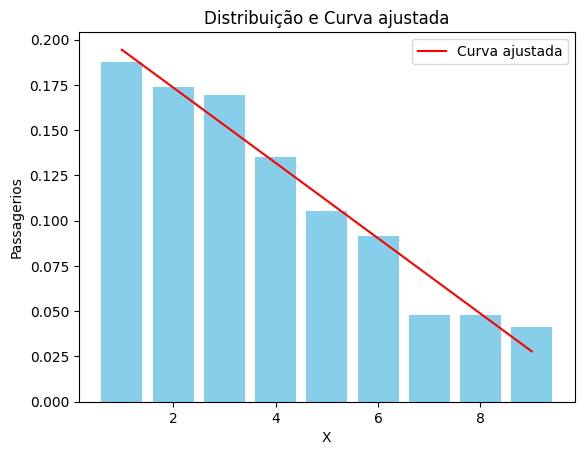

a = -0.020823798629228785, b = 0.21523010424440947


In [241]:
x_data = np.arange(1, len(data)+1)
y_data = data

params, covariance = curve_fit(poly_func, x_data, y_data)

y_fitted = poly_func(x_data, *params)

plt.bar(x_data, y_data, color='skyblue')
plt.plot(x_data, y_fitted, color='red', label='Curva ajustada')
plt.title('Distribuição e Curva ajustada')
plt.xlabel('X')
plt.ylabel('Passagerios')
plt.legend()
plt.show()

print("a = {}, b = {}".format(*params))

### Distribuindo a demanda

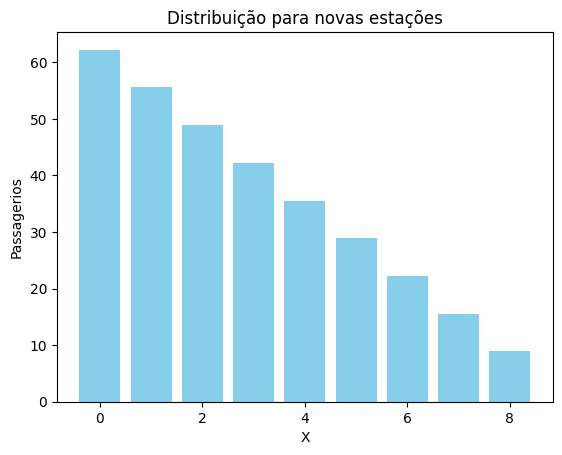

In [242]:
novas_estações_verde = (poly_func(np.arange(1, 10), *params))*320
plt.bar(np.arange(0, 9), novas_estações_verde, color='skyblue')
plt.title('Distribuição para novas estações')
plt.xlabel('X')
plt.ylabel('Passagerios')
plt.show()

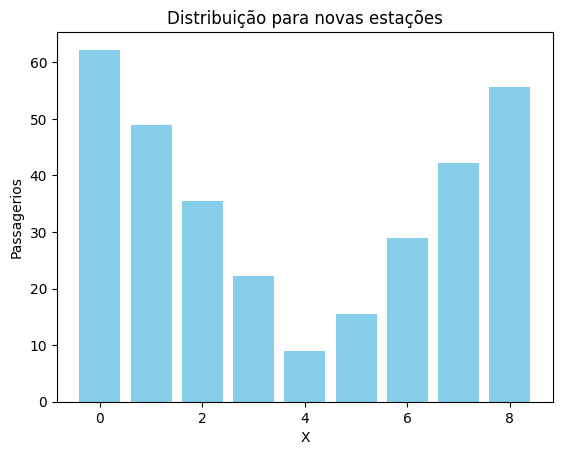

In [243]:
novas_estações_verde
l = len(novas_estações_verde)
distribuicao_verde = np.zeros(l)
i = 0
j = 0
while(i < round(l/2)):
    distribuicao_verde[i] = novas_estações_verde[j]
    distribuicao_verde[l-i-1] = novas_estações_verde[j+1]
    i = i + 1
    j = j + 2 
distribuicao_verde[round(l/2)] = novas_estações_verde[l-1]

plt.bar(np.arange(0, 9), distribuicao_verde, color='skyblue')
plt.title('Distribuição para novas estações')
plt.xlabel('X')
plt.ylabel('Passagerios')
plt.show()


In [244]:
data_linha_verde_e = {
    "Station": [
        "Vila Prudente", "Orfanato", "Santa Clara", "Anália Franco", "Vila Formosa", "Santa Isabel", "Guilherme Giorgi", "Aricanduva", "Penha"
    ],
    "Media": distribuicao_verde
}
linha_verde_e = pd.DataFrame(data_linha_verde_e)
linha_verde_e['Difference'] = linha_verde_e['Media'].diff().abs()
linha_verde_e


,Station,Media,Difference
0,Vila Prudente,62.210018,NaN
1,Orfanato,48.882787,13.327231
2,Santa Clara,35.555556,13.327231
3,Anália Franco,22.228324,13.327231
4,Vila Formosa,8.901093,13.327231
5,Santa Isabel,15.564709,6.663616
6,Guilherme Giorgi,28.891940,13.327231
7,Aricanduva,42.219171,13.327231
8,Penha,55.546402,13.327231


### Análise

In [245]:
G_verde = G.copy()
G_verde.add_nodes_from(["Orfanato", "Santa Clara", "Anália Franco", "Vila Formosa", "Santa Isabel", "Guilherme Giorgi", "Aricanduva", "Penha"])

In [246]:
G_verde.add_weighted_edges_from([("Vila Prudente", "Orfanato", 13.327231), ("Orfanato", "Santa Clara", 13.327231), ("Santa Clara", "Anália Franco", 13.327231), ("Anália Franco", "Vila Formosa", 13.327231), ("Vila Formosa", "Santa Isabel", 6.663616), ("Santa Isabel", "Guilherme Giorgi", 13.327231), ("Guilherme Giorgi", "Aricanduva", 13.327231), ("Aricanduva", "Penha", 13.327231)])

In [247]:
nx.write_gexf(G_verde, path="graph_verde.gexf", version="1.2draft")

![Grafo_verde](/home/paulo/Analise_do_sistema_metroviario_de_Sao_Paulo/Figures/MetroSP2024Verde.png)

In [248]:
data_verde = {
    "Ordem" : [G_verde.order()],
    "Tamanho" : [G_verde.size()],
    "Tamanho ponderado" : [G_verde.size(weight="weight")],
    "Conexo" : [nx.is_connected(G_verde)],
    "Menor caminho médio" : [nx.average_shortest_path_length(G_verde)],
    "Diametro" : [nx.diameter(G_verde)],
}

df_verde = pd.DataFrame(data_verde)
print(df_verde)

   Ordem  Tamanho  Tamanho ponderado  Conexo  Menor caminho médio  Diametro
0    181      192        7126.954233    True            14.299386        39


In [249]:
exc_verde= nx.eccentricity(G_verde)
max_dist_verde = [key for key, value in sorted(exc_verde.items(), key=lambda x: x[1], reverse=True)[:2]]
df_exc_verde = pd.DataFrame(list(exc_verde.items()), columns=["Node", "Eccentricity"]).sort_values(by="Eccentricity")

path_verde = nx.shortest_path(G_verde, source = max_dist_verde[0], target = max_dist_verde[1] , weight="weight")
print(max_dist_verde)
print(path_verde)

['Jundiaí', 'Varginha']
['Jundiaí', 'Várzea Paulista', 'Campo Limpo Paulista', 'Botujuru', 'Francisco Morato', 'Baltazar Fidélis', 'Franco da Rocha', 'Caieiras', 'Perus', 'Vila Aurora', 'Jaraguá', 'Vila Clarice', 'Pirituba', 'Piqueri', 'Lapa R', 'Agua Branca', 'Palmeiras-Barra Funda', 'Lapa D', 'Domingos Moraes', 'Imperatriz Leopoldina', 'Presidente Altino', 'Ceasa', 'Villa Lobos–Jaguaré', 'Cidade Universitária', 'Pinheiros', 'Hebraica–Rebouças', 'Cidade Jardim', 'Vila Olímpia', 'Berrini', 'Morumbi', 'Granja Julieta', 'João Dias', 'Santo Amaro', 'Socorro', 'Jurubatuba', 'Autódromo', 'Primavera–Interlagos', 'Grajaú', 'Bruno Covas/Mendes–Vila Natal', 'Varginha']


In [250]:
deg_centrality_verde = nx.degree_centrality(G_verde)

print(deg_centrality_verde)
centrality_sorted_verde = ((sorted(deg_centrality_verde.items(), key=lambda item: item[1],reverse=True)))
print(centrality_sorted_verde[0]) # vertice com maior centralidade de grau [relativa]

{'Jabaquara': 0.005555555555555556, 'Conceição': 0.011111111111111112, 'São Judas': 0.011111111111111112, 'Saúde': 0.011111111111111112, 'Praça da Árvore': 0.011111111111111112, 'Santa Cruz': 0.022222222222222223, 'Vila Mariana': 0.011111111111111112, 'Ana Rosa': 0.016666666666666666, 'Paraíso': 0.016666666666666666, 'Vergueiro': 0.011111111111111112, 'São Joaquim': 0.011111111111111112, 'Liberdade': 0.011111111111111112, 'Sé': 0.022222222222222223, 'São Bento': 0.011111111111111112, 'Luz': 0.02777777777777778, 'Tiradentes': 0.011111111111111112, 'Armênia': 0.011111111111111112, 'Portuguesa-Tietê': 0.011111111111111112, 'Carandiru': 0.011111111111111112, 'Santana': 0.011111111111111112, 'Jardim São Paulo-Ayrton Senna': 0.011111111111111112, 'Parada Inglesa': 0.011111111111111112, 'Tucuruvi': 0.005555555555555556, 'Vila Madalena': 0.005555555555555556, 'Santuário Nossa Senhora de Fátima-Sumaré': 0.011111111111111112, 'Clínicas': 0.011111111111111112, 'Paulista-Consolação': 0.02222222222

## Linha 6 Laranja

Segunda a [Linha Uni (9)](#Referencias) a linha laranja quando estiver pronta irá contar com 15 estações e atendera 633 mil passageiros por dia. Se ligando a linha 1 e 4 do metro. Para aproximar a demanda da linha laranja, iremos utilizar o mesmo método utilizado para linha verde, mas com a linha amarela como referência.

### Obetendo a reta de regressão

In [251]:
data_laranja = linha_amarela["Media"]
data_laranja = data_laranja.sort_values(ascending=False)
data_laranja = data_laranja/data_laranja.sum()

In [252]:
def poly_func2(x, a, b, c):
    return a * x**2 + b * x + c

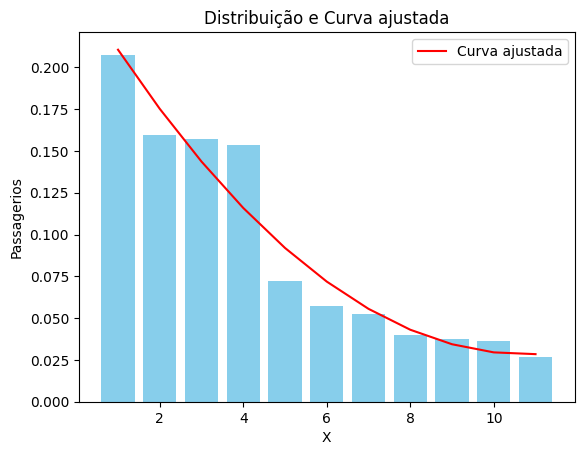

a = 0.0019061743281487686, b = -0.04108269821924493, c = 0.24972126101431746


In [253]:
x_data = np.arange(1, len(data_laranja)+1)
y_data = data_laranja

params, covariance = curve_fit(poly_func2, x_data, y_data)

y_fitted = poly_func2(x_data, *params)

plt.bar(x_data, y_data, color='skyblue')
plt.plot(x_data, y_fitted, color='red', label='Curva ajustada')
plt.title('Distribuição e Curva ajustada')
plt.xlabel('X')
plt.ylabel('Passagerios')
plt.legend()
plt.show()

print("a = {}, b = {}, c = {}".format(*params))

### Distribuindo a demanda

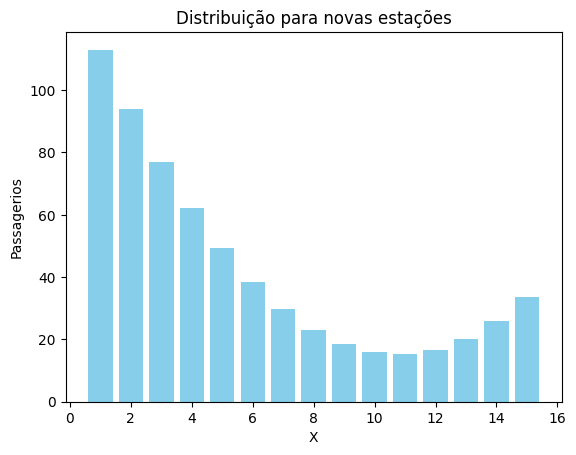

In [254]:
linha_laranja_dis = (poly_func2(np.arange(1, 16), *params))*633
linha_laranja_dis = linha_laranja_dis*(633/linha_laranja_dis.sum())
plt.bar(np.arange(1, 16), linha_laranja_dis, color='skyblue')
plt.title('Distribuição para novas estações')
plt.xlabel('X')
plt.ylabel('Passagerios')
plt.show()

In [255]:
linha_laranja_dis.sum()

np.float64(633.0000000000003)

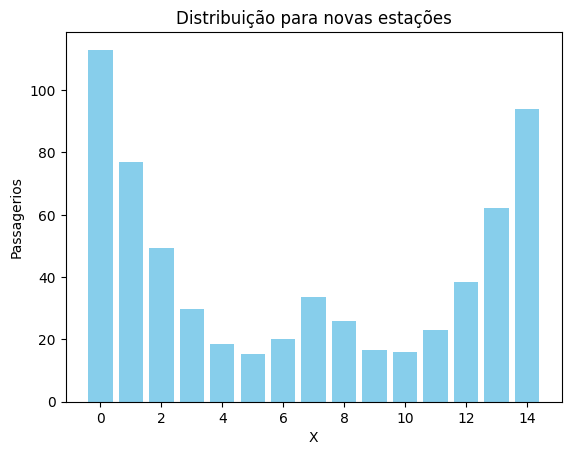

In [256]:
l = len(linha_laranja_dis)
distribuicao_laranja = np.zeros(l)
i = 0
j = 0
while(i < round(l/2)-1):
    distribuicao_laranja[i] = linha_laranja_dis[j]
    distribuicao_laranja[l-i-1] = linha_laranja_dis[j+1]
    i = i + 1
    j = j + 2 
distribuicao_laranja[round(l/2)-1] = linha_laranja_dis[l-1]

plt.bar(np.arange(0, 15), distribuicao_laranja, color='skyblue')
plt.title('Distribuição para novas estações')
plt.xlabel('X')
plt.ylabel('Passagerios')
plt.show()


In [257]:
data_linha_laranja_df = {
    "Station": [
        "Brasilandia", "Maristela", "Itaberaba-Hospital Vila Penteado", "João Paulo I", "Freguesia do Ó", "Santa Marina", "Água Branca", "SESC-Pompeia", "Perdizes", "PUC-Cardoso de Almeida", "FAAP-Pacaembu", "Higienópolis-Mackenzie", "14 Bis - Saracura", "Bela Vista", "São Joaquim"
    ],
    "Media": distribuicao_laranja
}
linha_laranja = pd.DataFrame(data_linha_laranja_df)
linha_laranja['Difference'] = linha_laranja['Media'].diff().abs()
linha_laranja

,Station,Media,Difference
0,Brasilandia,112.987726,NaN
1,Maristela,77.077606,35.910120
2,Itaberaba-Hospital Vila Penteado,49.350992,27.726613
3,João Paulo I,29.807887,19.543106
4,Freguesia do Ó,18.448289,11.359598
5,Santa Marina,15.272198,3.176091
6,Água Branca,20.279615,5.007417
7,SESC-Pompeia,33.470539,13.190924
8,Perdizes,25.852138,7.618400
9,PUC-Cardoso de Almeida,16.752968,9.099170


### Análise

In [258]:
G_laranja = G.copy()
G_laranja.add_nodes_from(["Brasilandia", "Maristela", "Itaberaba-Hospital Vila Penteado", "João Paulo I", "Freguesia do Ó", "Santa Marina", "Água Branca", "SESC-Pompeia", "Perdizes", "PUC-Cardoso de Almeida", "FAAP-Pacaembu", "Higienópolis-Mackenzie", "14 Bis - Saracura", "Bela Vista", "São Joaquim"])

In [259]:
G_laranja.add_weighted_edges_from([("Brasilandia", "Maristela", 36), ("Maristela", "Itaberaba-Hospital Vila Penteado", 28), ("Itaberaba-Hospital Vila Penteado", "João Paulo I", 20), ("João Paulo I", "Freguesia do Ó", 11), ("Freguesia do Ó", "Santa Marina", 3), ("Santa Marina", "Água Branca", 5), ("Água Branca", "SESC-Pompeia", 13), ("SESC-Pompeia", "Perdizes", 8), ("Perdizes", "PUC-Cardoso de Almeida", 9), ("PUC-Cardoso de Almeida", "FAAP-Pacaembu", 1), ("FAAP-Pacaembu", "Higienópolis-Mackenzie", 7), ("Higienópolis-Mackenzie", "14 Bis - Saracura", 15), ("14 Bis - Saracura", "Bela Vista", 24), ("Bela Vista", "São Joaquim", 32)])

In [260]:
nx.write_gexf(G_laranja, path="graph_laranja.gexf", version="1.2draft")

![Grafo_verde](/home/paulo/Analise_do_sistema_metroviario_de_Sao_Paulo/Figures/MetroSP2024Laranja.png)

In [261]:
data_laranja = {
    "Ordem" : [G_laranja.order()],
    "Tamanho" : [G_laranja.size()],
    "Tamanho ponderado" : [G_laranja.size(weight="weight")],
    "Conexo" : [nx.is_connected(G_laranja)],
    "Menor caminho médio" : [nx.average_shortest_path_length(G_laranja)],
    "Diametro" : [nx.diameter(G_laranja)],
}

df_laranja = pd.DataFrame(data_laranja)
print(df_laranja)

   Ordem  Tamanho  Tamanho ponderado  Conexo  Menor caminho médio  Diametro
0    187      198             7239.0    True            14.410327        39


In [262]:
exc_laranja = nx.eccentricity(G_laranja)
max_dist_laranja = [key for key, value in sorted(exc_laranja.items(), key=lambda x: x[1], reverse=True)[:2]]
df_exc_verde = pd.DataFrame(list(exc_laranja.items()), columns=["Node", "Eccentricity"]).sort_values(by="Eccentricity")

path_laranja = nx.shortest_path(G_laranja, source = max_dist_laranja[0], target = max_dist_laranja[1] , weight="weight")
print(max_dist_laranja)
print(path_laranja)

['Jundiaí', 'Varginha']
['Jundiaí', 'Várzea Paulista', 'Campo Limpo Paulista', 'Botujuru', 'Francisco Morato', 'Baltazar Fidélis', 'Franco da Rocha', 'Caieiras', 'Perus', 'Vila Aurora', 'Jaraguá', 'Vila Clarice', 'Pirituba', 'Piqueri', 'Lapa R', 'Agua Branca', 'Palmeiras-Barra Funda', 'Lapa D', 'Domingos Moraes', 'Imperatriz Leopoldina', 'Presidente Altino', 'Ceasa', 'Villa Lobos–Jaguaré', 'Cidade Universitária', 'Pinheiros', 'Hebraica–Rebouças', 'Cidade Jardim', 'Vila Olímpia', 'Berrini', 'Morumbi', 'Granja Julieta', 'João Dias', 'Santo Amaro', 'Socorro', 'Jurubatuba', 'Autódromo', 'Primavera–Interlagos', 'Grajaú', 'Bruno Covas/Mendes–Vila Natal', 'Varginha']


In [263]:
deg_centrality_laranja = nx.degree_centrality(G_laranja)

print(deg_centrality_laranja)
centrality_sorted_laranja = ((sorted(deg_centrality_laranja.items(), key=lambda item: item[1],reverse=True)))
print(centrality_sorted_laranja[0]) # vertice com maior centralidade de grau [relativa]

{'Jabaquara': 0.005376344086021506, 'Conceição': 0.010752688172043012, 'São Judas': 0.010752688172043012, 'Saúde': 0.010752688172043012, 'Praça da Árvore': 0.010752688172043012, 'Santa Cruz': 0.021505376344086023, 'Vila Mariana': 0.010752688172043012, 'Ana Rosa': 0.016129032258064516, 'Paraíso': 0.016129032258064516, 'Vergueiro': 0.010752688172043012, 'São Joaquim': 0.016129032258064516, 'Liberdade': 0.010752688172043012, 'Sé': 0.021505376344086023, 'São Bento': 0.010752688172043012, 'Luz': 0.02688172043010753, 'Tiradentes': 0.010752688172043012, 'Armênia': 0.010752688172043012, 'Portuguesa-Tietê': 0.010752688172043012, 'Carandiru': 0.010752688172043012, 'Santana': 0.010752688172043012, 'Jardim São Paulo-Ayrton Senna': 0.010752688172043012, 'Parada Inglesa': 0.010752688172043012, 'Tucuruvi': 0.005376344086021506, 'Vila Madalena': 0.005376344086021506, 'Santuário Nossa Senhora de Fátima-Sumaré': 0.010752688172043012, 'Clínicas': 0.010752688172043012, 'Paulista-Consolação': 0.02150537634

## Linha 17 Ouro

A linha 17 Ouro será composta por 8 estações e ligara as linhas atuais 5 Lílais e 9 Esmeralda com o aeroporto de Congonhas. A demanda estimada por dia da linha é de 93 mil passageiros segundo [8](#Referencias). A estimação da demanda será feita em relação a linha 15 Prata uma vez que ambas sõ mono trilhos tem um número aproximado de estações (8 e 10) e demanda diaria (93 mil e 128 mil).

### Obetendo a reta de regressão

In [264]:
linha_prata

,Estacao,Media,Difference
0,Vila Prudente,58,NaN
1,Oratorio,7,51.0
2,Sao Lucas,5,2.0
3,Camilo Haddad,4,1.0
4,Vila Tolstoi,5,1.0
5,Vila Uniao,6,1.0
6,Jardim Planalto,5,1.0
7,Sapopemba,9,4.0
8,Fazenda da Juta,4,5.0
9,Sao Mateus,16,12.0


In [265]:
def poly_func3(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

In [266]:
linha_prata_ = linha_prata["Media"]
linha_prata_ = linha_prata_.sort_values(ascending=False)
linha_prata_ = linha_prata_/linha_prata_.sum()

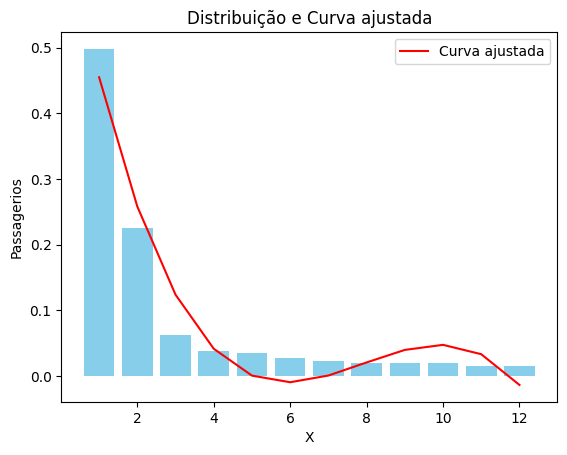

a = -0.0017590854188549443, b = 0.04179953206974407, c = -0.3097832416921962, d= 0.7246393900073791


In [267]:
x_data = np.arange(1, len(linha_prata_)+1)
y_data = linha_prata_

params, covariance = curve_fit(poly_func3, x_data, y_data)

y_fitted = poly_func3(x_data, *params)


plt.bar(x_data, y_data, color='skyblue')
plt.plot(x_data, y_fitted, color='red', label='Curva ajustada')
plt.title('Distribuição e Curva ajustada')
plt.xlabel('X')
plt.ylabel('Passagerios')
plt.legend()
plt.show()

print("a = {}, b = {}, c = {}, d= {}".format(*params))

### Distribuindo a demanda

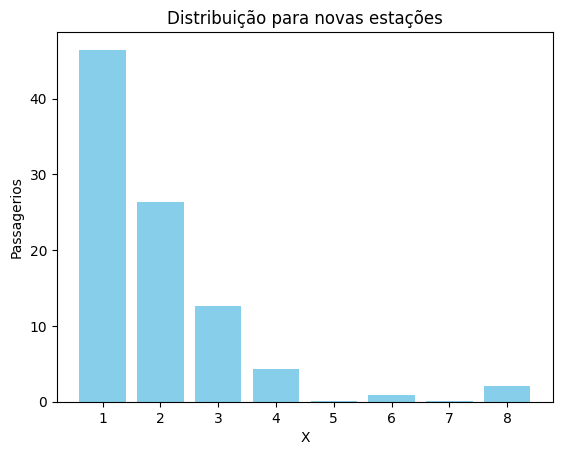

In [268]:
linha_ouro_dis = (poly_func3(np.arange(1, 9), *params))*93
linha_ouro_dis = np.abs(linha_ouro_dis)
linha_ouro_dis = linha_ouro_dis*(93/linha_ouro_dis.sum())
plt.bar(np.arange(1, 9), linha_ouro_dis, color='skyblue')
plt.title('Distribuição para novas estações')
plt.xlabel('X')
plt.ylabel('Passagerios')
plt.show()

In [269]:
linha_ouro_dis.sum()

np.float64(92.99999999999999)

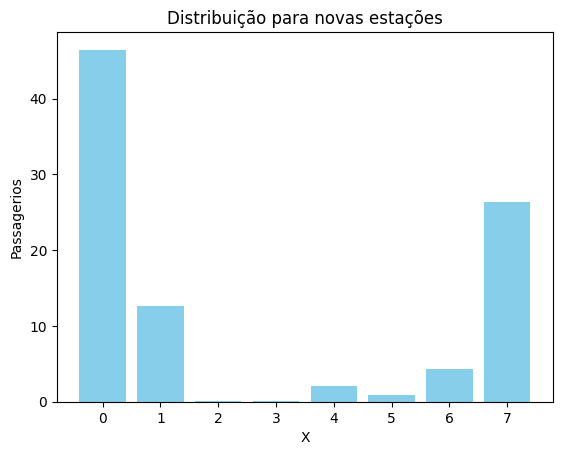

In [270]:
l = len(linha_ouro_dis)
distribuicao_ouro = np.zeros(l)
i = 0
j = 0
while(i < round(l/2)):
    distribuicao_ouro[i] = linha_ouro_dis[j]
    distribuicao_ouro[l-i-1] = linha_ouro_dis[j+1]
    i = i + 1
    j = j + 2 
distribuicao_ouro[round(l/2)] = linha_ouro_dis[l-1]

plt.bar(np.arange(0, 8), distribuicao_ouro, color='skyblue')
plt.title('Distribuição para novas estações')
plt.xlabel('X')
plt.ylabel('Passagerios')
plt.show()

In [271]:

data_linha_ouro_df = {
    "Station": [
        "Congonhas", "Jardim Aeroporto", "Brooklin Paulista", "Vereador José Diniz", "Campo Belo", "Vila Cordeiro", "Chucri Zaidan", "Morumbi"
    ],
    "Media": distribuicao_ouro
}
linha_ouro = pd.DataFrame(data_linha_ouro_df)
linha_ouro['Difference'] = linha_ouro['Media'].diff().abs()
linha_ouro

,Station,Media,Difference
0,Congonhas,46.452323,NaN
1,Jardim Aeroporto,12.661406,33.790917
2,Brooklin Paulista,0.084328,12.577078
3,Vereador José Diniz,0.098794,0.014466
4,Campo Belo,2.133389,2.034595
5,Vila Cordeiro,0.943488,1.189901
6,Chucri Zaidan,4.260030,3.316542
7,Morumbi,26.366241,22.106210


Segundo [A AENA](#Referencias) em 2023 o aeroporto de congonhas teve uma média de passageiros diarios de 60 mil, já o Aeroporto Internacional de São Paulo teve uma média diaria segundo [a GRU AIRPORT](#Referencias) de 110 mil passageiros diarios. Comparando a aproximação da média de utilização diaria para a estação de Congonhas (46 mil) com a estação Aeroporto_Guarulhos (9 mil), porém 40 mil passageiros que utilizaram o Aeroporto Internacional de São Paulo forám para vóos internacionais, além disso a estação Aeroporto-Guarulhos tem uma distancia consederavél até o terminais de embarque. Logo a aproximação da distribuição para linha ouro ficou um pouco distoante é o suficiente para a análise.

In [272]:
linha_jade

,Estacao,Media,Difference
0,Engenheiro Goulart,0.897871,NaN
1,Guarulhos–Cecap,3.928387,3.030516
2,Aeroporto-Guarulhos,9.084774,5.156387


### Análise

In [273]:
G_ouro = G.copy()
G_ouro.add_nodes_from(["Congonhas", "Jardim Aeroporto", "Brooklin Paulista", "Vereador José Diniz", "Campo Belo", "Vila Cordeiro", "Chucri Zaidan", "Morumbi"])

In [274]:
G_ouro.add_weighted_edges_from([("Congonhas", "Jardim Aeroporto", 34), ("Jardim Aeroporto", "Brooklin Paulista", 13), ("Brooklin Paulista", "Vereador José Diniz", 1), ("Vereador José Diniz", "Campo Belo", 2), ("Campo Belo", "Vila Cordeiro", 1), ("Vila Cordeiro", "Chucri Zaidan", 3), ("Chucri Zaidan", "Morumbi", 22)])

In [275]:
nx.write_gexf(G_ouro, path="graph_ouro.gexf", version="1.2draft")

![Grafo_ouro](/home/paulo/Analise_do_sistema_metroviario_de_Sao_Paulo/Figures/MetroSP2024Ouro.png)

In [276]:
data_ouro = {
    "Ordem" : [G_ouro.order()],
    "Tamanho" : [G_ouro.size()],
    "Tamanho ponderado" : [G_ouro.size(weight="weight")],
    "Conexo" : [nx.is_connected(G_ouro)],
    "Menor caminho médio" : [nx.average_shortest_path_length(G_ouro)],
    "Diametro" : [nx.diameter(G_ouro)],
}

df_ouro = pd.DataFrame(data_ouro)
print(df_ouro)

   Ordem  Tamanho  Tamanho ponderado  Conexo  Menor caminho médio  Diametro
0    180      191             7103.0    True            14.446989        39


In [277]:
exc_ouro = nx.eccentricity(G_ouro)
max_dist_ouro = [key for key, value in sorted(exc_ouro.items(), key=lambda x: x[1], reverse=True)[:2]]
df_exc_ouro = pd.DataFrame(list(exc_ouro.items()), columns=["Node", "Eccentricity"]).sort_values(by="Eccentricity")

path_ouro = nx.shortest_path(G_ouro, source = max_dist_ouro[0], target = max_dist_ouro[1] , weight="weight")
print(max_dist_ouro)
print(path_ouro)

['Jundiaí', 'Varginha']
['Jundiaí', 'Várzea Paulista', 'Campo Limpo Paulista', 'Botujuru', 'Francisco Morato', 'Baltazar Fidélis', 'Franco da Rocha', 'Caieiras', 'Perus', 'Vila Aurora', 'Jaraguá', 'Vila Clarice', 'Pirituba', 'Piqueri', 'Lapa R', 'Agua Branca', 'Palmeiras-Barra Funda', 'Lapa D', 'Domingos Moraes', 'Imperatriz Leopoldina', 'Presidente Altino', 'Ceasa', 'Villa Lobos–Jaguaré', 'Cidade Universitária', 'Pinheiros', 'Hebraica–Rebouças', 'Cidade Jardim', 'Vila Olímpia', 'Berrini', 'Morumbi', 'Granja Julieta', 'João Dias', 'Santo Amaro', 'Socorro', 'Jurubatuba', 'Autódromo', 'Primavera–Interlagos', 'Grajaú', 'Bruno Covas/Mendes–Vila Natal', 'Varginha']


In [278]:
deg_centrality_ouro = nx.degree_centrality(G_ouro)

print(deg_centrality_ouro)
centrality_sorted_ouro = ((sorted(deg_centrality_ouro.items(), key=lambda item: item[1],reverse=True)))
print(centrality_sorted_ouro[0]) # vertice com maior centralidade de grau [relativa]

{'Jabaquara': 0.00558659217877095, 'Conceição': 0.0111731843575419, 'São Judas': 0.0111731843575419, 'Saúde': 0.0111731843575419, 'Praça da Árvore': 0.0111731843575419, 'Santa Cruz': 0.0223463687150838, 'Vila Mariana': 0.0111731843575419, 'Ana Rosa': 0.01675977653631285, 'Paraíso': 0.01675977653631285, 'Vergueiro': 0.0111731843575419, 'São Joaquim': 0.0111731843575419, 'Liberdade': 0.0111731843575419, 'Sé': 0.0223463687150838, 'São Bento': 0.0111731843575419, 'Luz': 0.02793296089385475, 'Tiradentes': 0.0111731843575419, 'Armênia': 0.0111731843575419, 'Portuguesa-Tietê': 0.0111731843575419, 'Carandiru': 0.0111731843575419, 'Santana': 0.0111731843575419, 'Jardim São Paulo-Ayrton Senna': 0.0111731843575419, 'Parada Inglesa': 0.0111731843575419, 'Tucuruvi': 0.00558659217877095, 'Vila Madalena': 0.00558659217877095, 'Santuário Nossa Senhora de Fátima-Sumaré': 0.0111731843575419, 'Clínicas': 0.0111731843575419, 'Paulista-Consolação': 0.0223463687150838, 'Trianon-Masp': 0.0111731843575419, 'B

## Expansão completa

In [279]:
G.add_nodes_from(["Orfanato", "Santa Clara", "Anália Franco", "Vila Formosa", "Santa Isabel", "Guilherme Giorgi", "Aricanduva", "Penha"])

G.add_weighted_edges_from([("Vila Prudente", "Orfanato", 13.327231), ("Orfanato", "Santa Clara", 13.327231), ("Santa Clara", "Anália Franco", 13.327231), ("Anália Franco", "Vila Formosa", 13.327231), ("Vila Formosa", "Santa Isabel", 6.663616), ("Santa Isabel", "Guilherme Giorgi", 13.327231), ("Guilherme Giorgi", "Aricanduva", 13.327231), ("Aricanduva", "Penha", 13.327231)])

G.add_nodes_from(["Brasilandia", "Maristela", "Itaberaba-Hospital Vila Penteado", "João Paulo I", "Freguesia do Ó", "Santa Marina", "Água Branca", "SESC-Pompeia", "Perdizes", "PUC-Cardoso de Almeida", "FAAP-Pacaembu", "Higienópolis-Mackenzie", "14 Bis - Saracura", "Bela Vista", "São Joaquim"])

G.add_weighted_edges_from([("Brasilandia", "Maristela", 36), ("Maristela", "Itaberaba-Hospital Vila Penteado", 28), ("Itaberaba-Hospital Vila Penteado", "João Paulo I", 20), ("João Paulo I", "Freguesia do Ó", 11), ("Freguesia do Ó", "Santa Marina", 3), ("Santa Marina", "Água Branca", 5), ("Água Branca", "SESC-Pompeia", 13), ("SESC-Pompeia", "Perdizes", 8), ("Perdizes", "PUC-Cardoso de Almeida", 9), ("PUC-Cardoso de Almeida", "FAAP-Pacaembu", 1), ("FAAP-Pacaembu", "Higienópolis-Mackenzie", 7), ("Higienópolis-Mackenzie", "14 Bis - Saracura", 15), ("14 Bis - Saracura", "Bela Vista", 24), ("Bela Vista", "São Joaquim", 32)])

G.add_nodes_from(["Congonhas", "Jardim Aeroporto", "Brooklin Paulista", "Vereador José Diniz", "Campo Belo", "Vila Cordeiro", "Chucri Zaidan", "Morumbi"])

G.add_weighted_edges_from([("Congonhas", "Jardim Aeroporto", 34), ("Jardim Aeroporto", "Brooklin Paulista", 13), ("Brooklin Paulista", "Vereador José Diniz", 1), ("Vereador José Diniz", "Campo Belo", 2), ("Campo Belo", "Vila Cordeiro", 1), ("Vila Cordeiro", "Chucri Zaidan", 3), ("Chucri Zaidan", "Morumbi", 22)])

In [280]:
data = {
    "Ordem" : [G.order()],
    "Tamanho" : [G.size()],
    "Tamanho ponderado" : [G.size(weight="weight")],
    "Conexo" : [nx.is_connected(G)],
    "Menor caminho médio" : [nx.average_shortest_path_length(G)],
    "Diametro" : [nx.diameter(G)],
}

df2 = pd.DataFrame(data)
print(df2)

   Ordem  Tamanho  Tamanho ponderado  Conexo  Menor caminho médio  Diametro
0    200      213        7414.954233    True            14.359045        39


In [281]:
exc = nx.eccentricity(G)
max_dist = [key for key, value in sorted(exc.items(), key=lambda x: x[1], reverse=True)[:2]]


df_exc = pd.DataFrame(list(exc.items()), columns=["Node", "Eccentricity"]).sort_values(by="Eccentricity")

path = nx.shortest_path(G, source = max_dist[0], target = max_dist[1] , weight="weight")
print(max_dist)
print(path)

['Jundiaí', 'Varginha']
['Jundiaí', 'Várzea Paulista', 'Campo Limpo Paulista', 'Botujuru', 'Francisco Morato', 'Baltazar Fidélis', 'Franco da Rocha', 'Caieiras', 'Perus', 'Vila Aurora', 'Jaraguá', 'Vila Clarice', 'Pirituba', 'Piqueri', 'Lapa R', 'Agua Branca', 'Palmeiras-Barra Funda', 'Lapa D', 'Domingos Moraes', 'Imperatriz Leopoldina', 'Presidente Altino', 'Ceasa', 'Villa Lobos–Jaguaré', 'Cidade Universitária', 'Pinheiros', 'Hebraica–Rebouças', 'Cidade Jardim', 'Vila Olímpia', 'Berrini', 'Morumbi', 'Granja Julieta', 'João Dias', 'Santo Amaro', 'Socorro', 'Jurubatuba', 'Autódromo', 'Primavera–Interlagos', 'Grajaú', 'Bruno Covas/Mendes–Vila Natal', 'Varginha']


In [282]:
deg_centrality = nx.degree_centrality(G)

print(deg_centrality)
centrality_sorted = ((sorted(deg_centrality.items(), key=lambda item: item[1],reverse=True)))
print(centrality_sorted[0]) # vertice com maior centralidade de grau [relativa]


{'Jabaquara': 0.005025125628140704, 'Conceição': 0.010050251256281407, 'São Judas': 0.010050251256281407, 'Saúde': 0.010050251256281407, 'Praça da Árvore': 0.010050251256281407, 'Santa Cruz': 0.020100502512562814, 'Vila Mariana': 0.010050251256281407, 'Ana Rosa': 0.01507537688442211, 'Paraíso': 0.01507537688442211, 'Vergueiro': 0.010050251256281407, 'São Joaquim': 0.01507537688442211, 'Liberdade': 0.010050251256281407, 'Sé': 0.020100502512562814, 'São Bento': 0.010050251256281407, 'Luz': 0.02512562814070352, 'Tiradentes': 0.010050251256281407, 'Armênia': 0.010050251256281407, 'Portuguesa-Tietê': 0.010050251256281407, 'Carandiru': 0.010050251256281407, 'Santana': 0.010050251256281407, 'Jardim São Paulo-Ayrton Senna': 0.010050251256281407, 'Parada Inglesa': 0.010050251256281407, 'Tucuruvi': 0.005025125628140704, 'Vila Madalena': 0.005025125628140704, 'Santuário Nossa Senhora de Fátima-Sumaré': 0.010050251256281407, 'Clínicas': 0.010050251256281407, 'Paulista-Consolação': 0.02010050251256

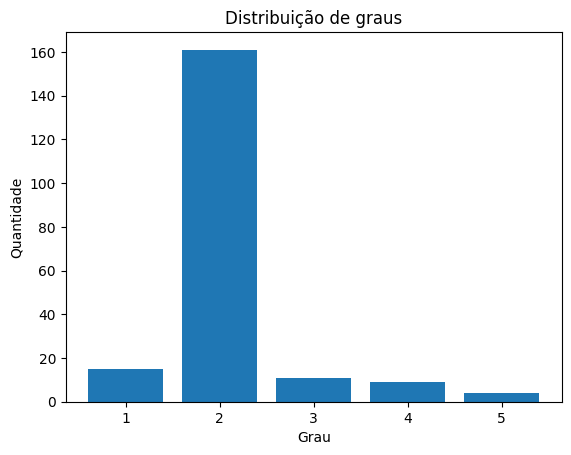

In [283]:
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)
plt.bar(*np.unique(degree_sequence, return_counts=True))
plt.title("Distribuição de graus")
plt.xlabel("Grau")
plt.ylabel("Quantidade")
plt.show()

In [284]:
print(df)
print(df_verde)
print(df_laranja)
print(df_ouro)
print(df2)

   Ordem  Tamanho  Tamanho ponderado  Conexo  Menor caminho médio  Diametro
0    174      184             7027.0    True            14.416052        39
   Ordem  Tamanho  Tamanho ponderado  Conexo  Menor caminho médio  Diametro
0    181      192        7126.954233    True            14.299386        39
   Ordem  Tamanho  Tamanho ponderado  Conexo  Menor caminho médio  Diametro
0    187      198             7239.0    True            14.410327        39
   Ordem  Tamanho  Tamanho ponderado  Conexo  Menor caminho médio  Diametro
0    180      191             7103.0    True            14.446989        39
   Ordem  Tamanho  Tamanho ponderado  Conexo  Menor caminho médio  Diametro
0    200      213        7414.954233    True            14.359045        39


![Grafo_final](/home/paulo/Analise_do_sistema_metroviario_de_Sao_Paulo/Figures/MetroSP2024Final.png)

# Referencias

1. https://transparencia.metrosp.com.br/dataset/demanda/resource/e69866e9-6c7a-424f-ad4d-816c6b96b1c4
2. https://www.viamobilidade.com.br/nos/passageiros-transportados/linha-9-esmeralda
3. https://www.viamobilidade.com.br/nos/passageiros-transportados/linha-8-diamante
4. https://www.viamobilidade.com.br/nos/passageiros-transportados/linha-5-lilas
5. https://www.viaquatro.com.br/linha-4-amarela/passageiros-transportados
6. https://www.linhauni.com.br/linha-6-laranja
7. https://www.metro.sp.gov.br/obras/linha-2-verde/
8. https://www.metro.sp.gov.br/obras/linha-17-ouro/
9. https://www.aenabrasil.com.br/sites/Satellite?c=Prensa_FA&cid=1575152708484&pagename=Passageiros%2FPrensa_FA%2FDetalleNoticia&p=1575031500565
10. https://www.gru.com.br/en/passenger/noticias-detalhe?code=328